In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("../Data/shampoo.csv",parse_dates=["Month"],index_col=["Month"])

In [8]:
df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [4]:
df.shape

(36, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [10]:
df.isna().sum()

Sales    0
dtype: int64

<AxesSubplot:xlabel='Month'>

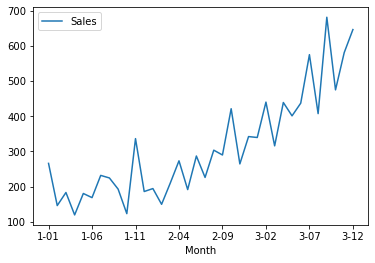

In [11]:
df.plot()

### Checking the stationarity of TS

In [14]:
def checkStationarity(df):
    from statsmodels.tsa.stattools import adfuller
    res=adfuller(df)
    p_val=res[1]
    if p_val>0.05:
        print("Not Stationary")
    else:
        print("Stationary")

In [15]:
checkStationarity(df.Sales)

Not Stationary


### Lets find out the differencing Order

In [18]:
checkStationarity(df["Sales"].diff().dropna())

Stationary


Text(0.5, 1.0, '2 nd Differencing')

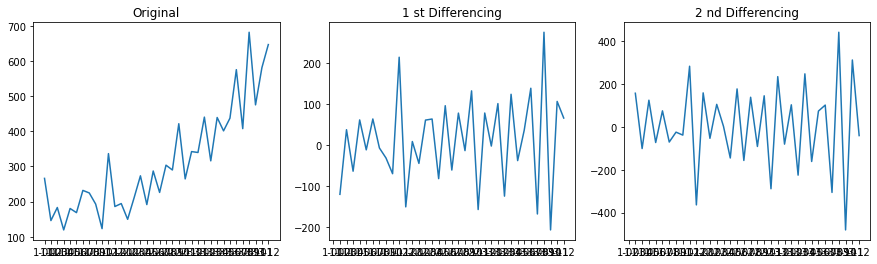

In [29]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(df["Sales"])
plt.title("Original")
plt.subplot(1,3,2)
plt.plot(df["Sales"].diff())
plt.title("1 st Differencing")
plt.subplot(1,3,3)
plt.plot(df["Sales"].diff().diff())
plt.title("2 nd Differencing")

In [ ]:
#d=1,2

#### Finding value of P

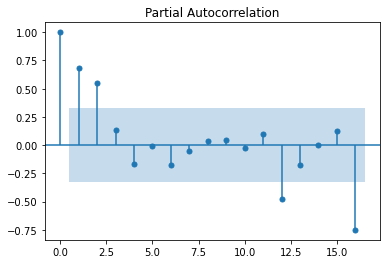

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plot_pacf(df.Sales)

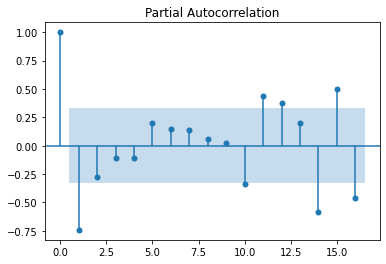

In [33]:
fig=plot_pacf(df.Sales.diff().dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


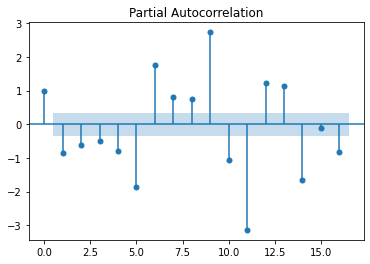

In [35]:
fig=plot_pacf(df.Sales.diff().diff().dropna())

### Finding q 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

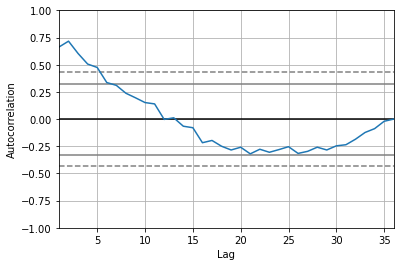

In [36]:
pd.plotting.autocorrelation_plot(df.Sales)

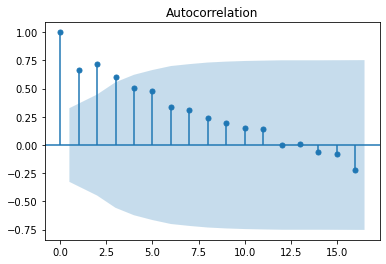

In [41]:
fig=plot_acf(df.Sales)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
x=df.Sales
#order=p,d,q
model= ARIMA(x,order=(1,1,1))
model_fit=model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(1, 1)   Log Likelihood                -211.054
Method:                       css-mle   S.D. of innovations             82.810
Date:                Thu, 01 Jul 2021   AIC                            430.108
Time:                        16:43:31   BIC                            436.442
Sample:                             0   HQIC                           432.319
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         372.7102    152.356      2.446      0.014      74.098     671.322
ar.L1.Sales     0.9802      0.026     37.354      0.000       0.929       1.032
ma.L1.Sales    -0.5855      0.101     -5.797    

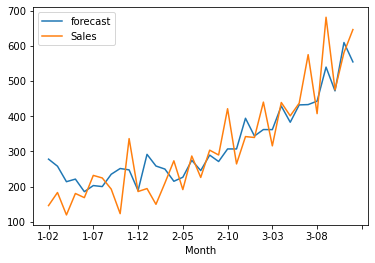

In [39]:
model_fit.plot_predict()
plt.show()